In [436]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss, seed
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm

from statsmodels.formula.api import ols
%matplotlib inline


In [475]:
df = pd.read_csv('kc_house_data.csv')

In [476]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [477]:
# This is going to give us a table without extra information
to_drop = ['id', 'date', 'view', 'sqft_above', 
           'sqft_basement', 'yr_renovated', 
           'zipcode', 'lat', 'long', 
           'sqft_living15', 'sqft_lot15']
df.drop(to_drop, inplace=True, axis=1)

In [479]:
df_simple['grade_number'] = test

In [480]:
df_simple = df
df_simple

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [481]:
test = [i[0:2].strip() for i in df_simple['grade']]

In [482]:
df_simple['grade_number'] = test
del df['grade']


In [483]:
df_simple

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,test
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,1955,7
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,1951,7
2,180000.0,2,1.00,770,10000,1.0,NO,Average,1933,6
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,1965,7
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,1987,8
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,2009,8
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,2014,8
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,2009,7
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,2004,8


In [484]:
bedrooms.iloc[15856] = 3

/Users/raulcassieltorresponce/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [485]:
bedrooms.max()

11

In [486]:
df_simple

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,test
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,1955,7
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,1951,7
2,180000.0,2,1.00,770,10000,1.0,NO,Average,1933,6
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,1965,7
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,1987,8
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,2009,8
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,2014,8
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,2009,7
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,2004,8


In [493]:
df_simple.shape

(21597, 10)

In [500]:
i = df_simple.loc[df_simple['bedrooms'] <= 6]


In [501]:
i.shape

(21535, 10)

In [488]:
df_simple.drop(15856)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,test
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,1955,7
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,1951,7
2,180000.0,2,1.00,770,10000,1.0,NO,Average,1933,6
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,1965,7
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,1987,8
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,2009,8
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,2014,8
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,2009,7
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,2004,8


In [489]:
df_simple

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,test
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,1955,7
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,1951,7
2,180000.0,2,1.00,770,10000,1.0,NO,Average,1933,6
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,1965,7
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,1987,8
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,2009,8
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,2014,8
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,2009,7
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,2004,8


/Users/raulcassieltorresponce/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

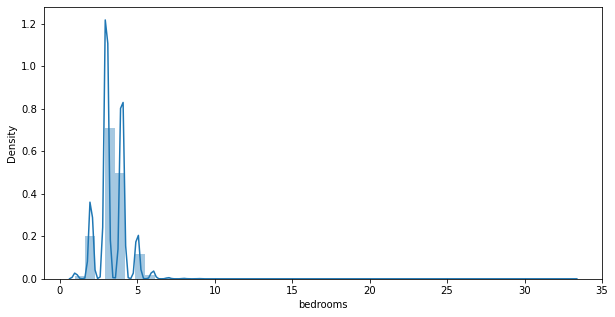

In [490]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot( a=df_simple["bedrooms"], hist=True)

In [358]:
bedrooms.describe()

count    21597.000000
mean         3.371811
std          0.904096
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [409]:
price = df_simple['price']
type(price[0])

numpy.float64

/Users/raulcassieltorresponce/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


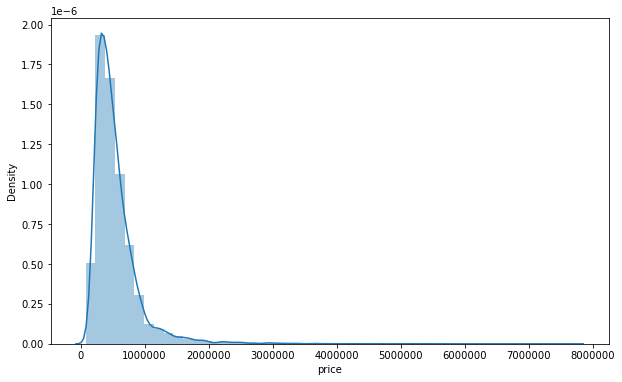

In [410]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot( a=df_simple['price'], hist=True)

# this turns of scientific notation for numerical vals
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

In [411]:
bathrooms = df_simple['bathrooms']
bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

/Users/raulcassieltorresponce/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

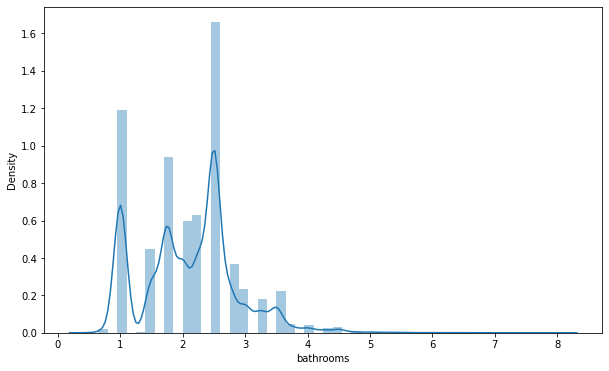

In [412]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot( a=df_simple["bathrooms"], hist=True)

In [413]:
sqft_living = df_simple['sqft_living']

In [414]:
sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

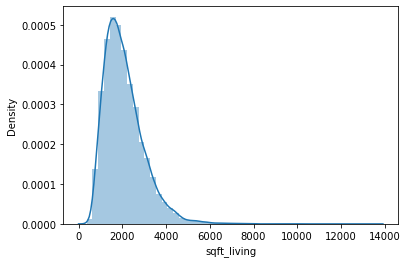

In [416]:
sns.distplot( a=df_simple["sqft_living"], hist=True)

In [374]:
endog = df['price']
exog = sm.add_constant(df['bedrooms'])
simple_model = sm.OLS(endog=endog, exog=exog).fit()
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:32:51   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [375]:
endog = df['price']
exog = sm.add_constant(df['bathrooms'])
simple_model = sm.OLS(endog=endog, exog=exog).fit()
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:33:02   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [386]:
endog = df['price']
exog = sm.add_constant(df['sqft_living'])
simple_model = sm.OLS(endog=endog, exog=exog).fit()
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:42:06   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [381]:
the_big_3 = ['sqft_living', 'bathrooms', 'bedrooms']


In [420]:
Y = df['price']
X = df_simple[the_big_3]


multi_model = sm.OLS(Y, sm.add_constant(X)).fit()
multi_model_summary = multi_model.summary()
multi_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:28:12   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.639e+04   6956.321     10.981      0.000    6.28e+04       9e+04
sqft_living   310.1848      3.101    100.011      0.000     304.106     316.264
bathrooms    7659.0953   3523.302      2.174      0.030     753.163    1.46e+04
bedrooms    -5.857e+04   2347.628    -24.950      0.000   -6.32e+04    -5.4e+04
==============================================================================
Omnibus:                    14417.262   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490912.091
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      25.707   Cond. No.                     9.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [418]:
X

,sqft_living,bathrooms,bedrooms
0,1180,1.00,3
1,2570,2.25,3
2,770,1.00,2
3,1960,3.00,4
4,1680,2.00,3
...,...,...,...
21592,1530,2.50,3
21593,2310,2.50,4
21594,1020,0.75,2
21595,1600,2.50,3
